# Install libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Load Dataset

In [71]:
concreteDf = pd.read_csv('./dataset/concrete.csv')
concreteDf.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


# Shape of the data

In [72]:
# Get the shape of Concrete data
concreteDf.shape

(1030, 9)

In [73]:
print("Number of rows = {0} and number of columns = {1}".format(concreteDf.shape[0], concreteDf.shape[1]))

Number of rows = 1030 and number of columns = 9


# Data type of each attribute

In [74]:
# Check data types of columns
concreteDf.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [75]:
# Check data frame info
concreteDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [76]:
# Column name of Data frame
concreteDf.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

# Data Cleaning

In [77]:
# Check duplicates in a data frame
concreteDf.duplicated().sum()

25

In [78]:
# View the duplicate rows
duplicates = concreteDf.duplicated()

concreteDf[duplicates]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


No need to worry about preserving the data; it is already a part of the concrete dataset and we can merely remove or drop these rows from your cleaned data

## Drop duplicates

In [79]:
# Delete duplicate rows
concreteDf.drop_duplicates(inplace=True)

In [80]:
# Get the shape of Concrete data
concreteDf.shape

(1005, 9)

## Check Outliers

<Axes: >

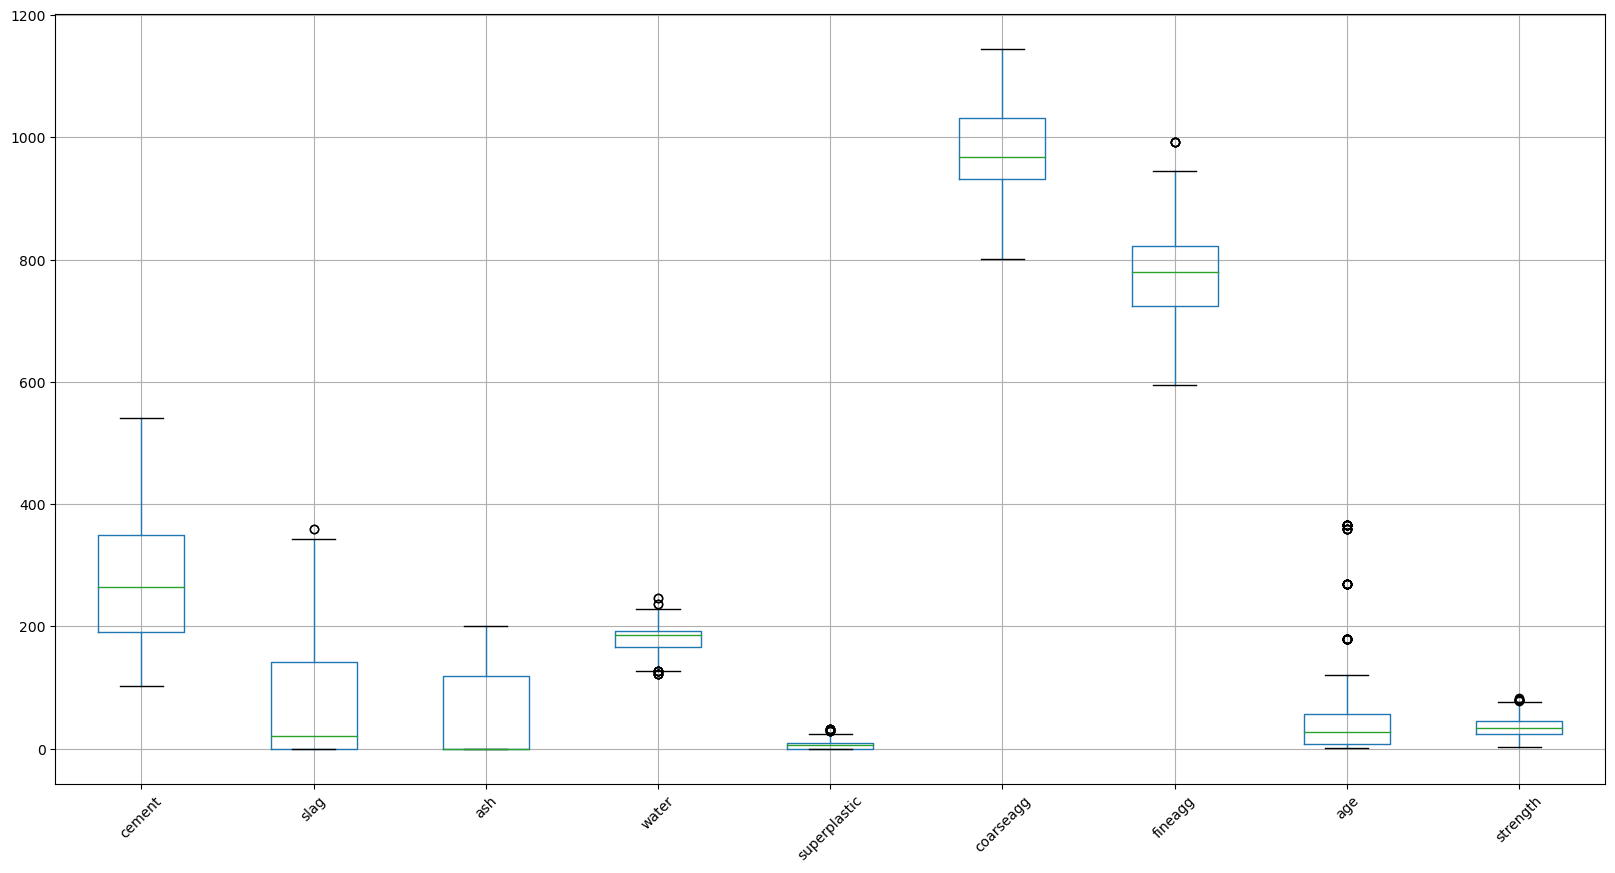

In [81]:
# Create a boxplot for all the continuous variables
concreteDf.boxplot(column= ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength'], rot=45, figsize=(20, 10))

Looking at the plot above: Stag, Water, Superplastic, Fineagg, Age, and Strength columns have outliers and we need to treat those outliers \
Notice the dot: that we see they are outliers

## Work with outliers: correcting and removing them

In [82]:
concreteDfOutliers = pd.DataFrame(concreteDf.loc[:,])
Q1 = concreteDfOutliers.quantile(0.25)
Q3 = concreteDfOutliers.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

cement          158.30
slag            142.50
ash             118.30
water            26.30
superplastic     10.00
coarseagg        99.00
fineagg          97.90
age              49.00
strength         21.35
dtype: float64


Note: the first array contains the list of row numbers and second array respective column numbers in concreteDfOutliers data frame

In [83]:
concreteDf.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [84]:
# Use the IQR to remove outliers by keeping only valid values

# Replace every outlier on the upper side by the upper whisker - for 'water', 'superplastic', 'fineagg', 'age', 'strength' columns

for i, j in zip(np.where(concreteDfOutliers > Q3 + 1.5 * IQR)[0], np.where(concreteDfOutliers > Q3 + 1.5 * IQR)[1]):
    
    whisker = Q3 + 1.5 * IQR
    concreteDfOutliers.iloc[i, j] = whisker[j]

# Replace every outlier on the lower side by the lower whisker - for 'water' columns
for i, j in zip(np.where(concreteDfOutliers < Q1 - 1.5 * IQR)[0], np.where(concreteDfOutliers < Q1 - 1.5 * IQR)[1]):

    whisker = Q1 - 1.5 * IQR
    concreteDfOutliers.iloc[i, j] = whisker[j]

In [85]:
# Remove outliers columns 'water', 'superplastic', 'fineagg', 'age', 'strength'
concreteDf.drop(columns=concreteDf.loc[:,], inplace=True)

In [86]:
# Add 'water', 'superplastic', 'fineagg', 'age', 'water', 'strength' columns to the original data frame outliers from the original data frame
concreteDf = pd.concat([concreteDf, concreteDfOutliers], axis=1)

## Check Outliers after correction

<Axes: >

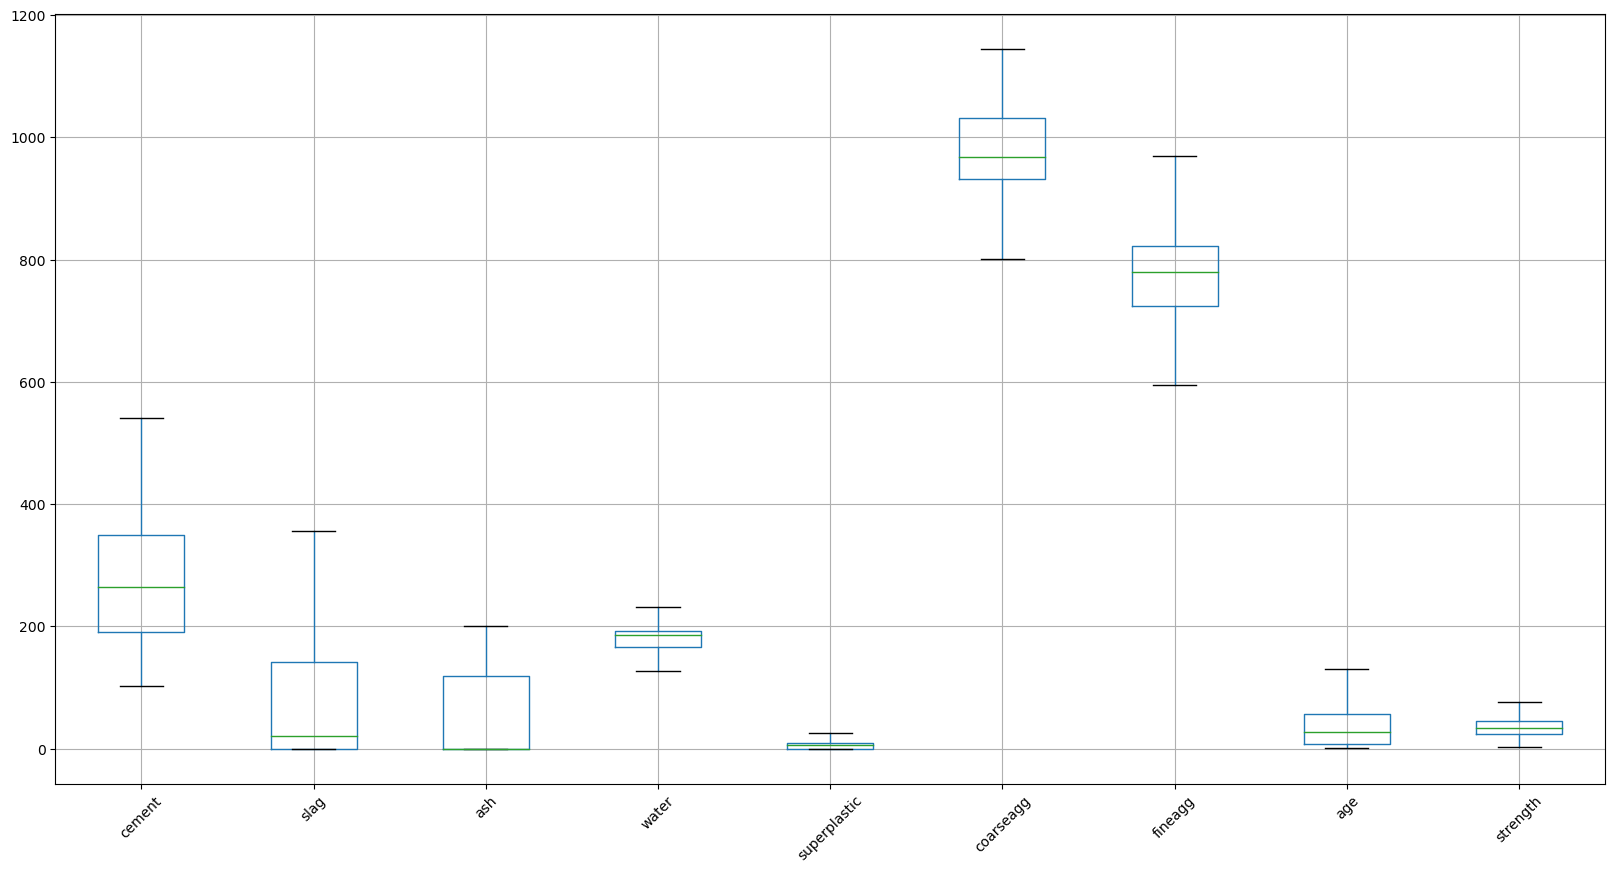

In [87]:
# Create a boxplot for all the continuous variables
concreteDf.boxplot(column= ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength'], rot=45, figsize=(20, 10))

Looking at the above plot, there are no more outliers in concrete data set